# 1. 사전 세팅

In [ ]:
import warnings
warnings.filterwarnings('ignore')

%cd "/content/drive/MyDrive/데이터 분석/projects/ML_protfoilo/6_smoking_status_classification"

# 2. 문제 정의

---

    실제 건강검진에서는 흡연 여부를 자가보고로만 받기 때문에, 거짓 응답이 가능하다는 점이 문제가 될 수 있다.
    건강검진 데이터만으로 개인의 흡연 여부를 예측할 수 있을까?
    건강검진 수치만으로 흡연 여부를 판별 가능한지 확인해보고, 어떤 생체 지표가 흡연자의 특징으로 작용하는지 해석해보려고 한다.


## 2.1. 도메인 지식

---

▸ 흡연이 인체에 미치는 영향

    흡연은 단순히 폐에만 영향을 주지 않는다.
    니코틴과 일산화탄소 등 독성물질은 혈액을 통해 전신으로 퍼지며, 심혈관계·간·신장·혈액 구성 등 다양한 기관의 수치를 변화시킨다.
    건강검진 수치에서도 그 흔적이 나타나며, 장기간 흡연자는 비흡연자와 구별되는 생체 패턴을 보인다.

▸ 대사·혈액 지표 변화

    흡연자는 혈액 속 산소 운반 효율이 떨어지기 때문에 신체가 이를 보상하기 위해 헤모글로빈 수치가 상대적으로 높게 나타나는 경향이 있다.
    또한 니코틴은 지방 분해를 촉진해 중성 지방과 LDL(나쁜 콜레스테롤)을 높이고, 반대로 HDL(좋은 콜레스테롤)을 감소시키는 지질 대사 변화를 유발한다.

    니코틴과 타르, 일산화탄소 등의 독성 물질이 간에서 해독 과정을 거치며,
    그 결과 AST·ALT와 같은 간 효소 비율(간 효소율)이 정상 범위를 벗어나거나 높게 나타나는 경우가 많다.
    비슷하게, 공복 혈당 수치 또한 흡연자의 경우 높게 측정되는 경향이 있는데,
    이는 니코틴이 인슐린 저항성을 증가시켜 당 대사 기능을 저하시킬 수 있기 때문이다.

    니코틴은 식욕을 억제하고 기초대사율을 높이기 때문에 흡연자는 일반적으로 BMI가 다소 낮은 경향을 보이지만,
    금연 이후에는 이 효과가 사라져 체중이 급격히 증가하는 경우도 흔하다.

# 3. 데이터 간단 확인

## 3.1. 데이터 명세

---

| Column     | Description                          |
| :--------- | :----------------------------------- |
| `ID`       | 각 행(개인)을 구분하기 위한 고유 식별자              |
| `나이`       | 피검자의 나이 (세)                          |
| `키(cm)`    | 신장 (단위: cm)                          |
| `몸무게(kg)`  | 체중 (단위: kg)                          |
| `BMI`      | 체질량지수 (몸무게 / 키², 비만도 지표)             |
| `시력`       | 시력 수치 (일반적으로 1.0 기준)                 |
| `충치`       | 충치 여부 (0: 없음, 1: 있음)                 |
| `공복 혈당`    | 8시간 이상 공복 후의 혈당 수치 (단위: mg/dL)       |
| `혈압`       | 수축기/이완기 혈압을 종합한 지표 (상대적 혈압 수준)       |
| `중성 지방`    | 혈중 중성지방(Triglyceride) 농도 (단위: mg/dL) |
| `혈청 크레아티닌` | 신장 기능 지표 (단위: mg/dL)                 |
| `콜레스테롤`    | 총 콜레스테롤 수치 (단위: mg/dL)               |
| `고밀도지단백`   | HDL 콜레스테롤 — 좋은 콜레스테롤 (단위: mg/dL)     |
| `저밀도지단백`   | LDL 콜레스테롤 — 나쁜 콜레스테롤 (단위: mg/dL)     |
| `헤모글로빈`    | 혈중 헤모글로빈 농도 (산소 운반 능력 관련)            |
| `요 단백`     | 소변 내 단백질 농도 단계 (신장 손상 지표, 1~5)       |
| `간 효소율`    | AST/ALT 비율 기반 간 기능 지표                |
| `label`    | 흡연 여부 (1: 흡연자, 0: 비흡연자)              |


## 3.2. 데이터 가공 명세

---

| 명세 | 내용 |
|:----|:----|
| 가공 범위 | <input type="checkbox" checked> Feature(Column) 변형<br> <input type="checkbox">기간 단위 데이터 분석 및 Big Volume 특성을 반영하기 위한 데이터 증강<br> <input type="checkbox">다양한 Table을 참조하기 위한 데이터 분할|
| 가공 상세 | <b>Feature(Column) 변형</b><br><br>- 불필요한 컬럼(ID) 제거<br> |
| 가공 결과 | <b>As is</b><br><br>- row: 7000 / column: 17 / table: 2<br><br> <b>To be</b><br><br>- row: 7000 / column: 16(-1) / table: 2  |

## 3.3. 데이터 살펴보기

In [ ]:
import pandas as pd
import numpy as np

train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

train.head()

In [ ]:
test.head()

In [ ]:
train.shape, test.shape



```
((7000, 18), (3000, 17))
```



In [ ]:
print(list(train.columns))



```
['ID', '나이', '키(cm)', '몸무게(kg)', 'BMI', '시력', '충치', '공복 혈당', '혈압',
 '중성 지방', '혈청 크레아티닌', '콜레스테롤', '고밀도지단백',
 '저밀도지단백', '헤모글로빈', '요 단백', '간 효소율', 'label']
```



# 4. 문제 해결 프로세스 정의

---

▸ 문제

    흡연 여부는 보통 건강검진 설문지를 통해 본인이 직접 기입하지만,
    자가보고 방식은 응답자의 인식이나 사회적 이유로 인해 정확도가 떨어지는 문제가 있다.
    일부는 실제로 흡연 중임에도 불구하고 “비흡연자”로 기입하기도 하며,
    이로 인해 건강검진 데이터 분석 및 질병 예측 모델의 신뢰도가 낮아질 수 있다.
    
▸ 기대 효과

    모델만으로 흡연 여부를 단정할 수는 없지만,
    의사나 보건기관이 자가보고 응답의 신뢰성을 검증할 수 있는 참고 지표로 활용 가능하다.
    이를 통해 건강검진 데이터의 정확도를 개선하고,
    흡연 관련 질환(폐암, 간질환, 고혈압 등)에 대한 조기 경고 시스템 구축의 기반이 될 수 있다.

▸ 해결 방안

    흡연 여부는 0과 1로 구분되는 Binary Classification 문제로 정의할 수 있다.
    이를 위해 다양한 분류 알고리즘을 적용한다.

▸ 성과 측정

    Accuracy, Precision, Recall, F1-score, ROC-AUC
    특히 Recall을 중심으로, 흡연자인데 비흡연자로 잘못 분류되는 False Negative를 최소화하는 방향으로 모델을 개선한다.

▸ 현업 적용

    건강검진 시스템이나 보건소 데이터 분석 플랫폼에 보조 예측 모델로 연동할 수 있으며,
    자가보고 응답의 오류 감지 또는 위험군 모니터링 자동화 등에 적용 가능하다.

# 5. 데이터 확인

In [ ]:
# 필요한 패키지들 import
import numpy as np
import pandas as pd
from scipy.stats import stats
from time import time
from pprint import pprint

# from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, cohen_kappa_score, precision_recall_fscore_support

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

print(train.shape, test.shape)

In [ ]:
train.info()



```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        7000 non-null   object
 1   나이        7000 non-null   int64  
 2   키(cm)     7000 non-null   int64  
 3   몸무게(kg)   7000 non-null   int64  
 4   BMI       7000 non-null   float64
 5   시력        7000 non-null   float64
 6   충치        7000 non-null   int64  
 7   공복 혈당     7000 non-null   int64  
 8   혈압        7000 non-null   int64  
 9   중성 지방     7000 non-null   int64  
 10  혈청 크레아티닌  7000 non-null   float64
 11  콜레스테롤     7000 non-null   int64  
 12  고밀도지단백    7000 non-null   int64  
 13  저밀도지단백    7000 non-null   int64  
 14  헤모글로빈     7000 non-null   float64
 15  요 단백      7000 non-null   int64  
 16  간 효소율     7000 non-null   float64
 17  label     7000 non-null   int64  
dtypes: float64(5), int64(12), object(1)
memory usage: 984.5+ KB
```



In [ ]:
test.info()



```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        3000 non-null   object
 1   나이        3000 non-null   int64  
 2   키(cm)     3000 non-null   int64  
 3   몸무게(kg)   3000 non-null   int64  
 4   BMI       3000 non-null   float64
 5   시력        3000 non-null   float64
 6   충치        3000 non-null   int64  
 7   공복 혈당     3000 non-null   int64  
 8   혈압        3000 non-null   int64  
 9   중성 지방     3000 non-null   int64  
 10  혈청 크레아티닌  3000 non-null   float64
 11  콜레스테롤     3000 non-null   int64  
 12  고밀도지단백    3000 non-null   int64  
 13  저밀도지단백    3000 non-null   int64  
 14  헤모글로빈     3000 non-null   float64
 15  요 단백      3000 non-null   int64  
 16  간 효소율     3000 non-null   float64
dtypes: float64(5), int64(11), object(1)
memory usage: 398.6+ KB
```



In [ ]:
train.drop('ID', axis=1).describe().T.round(2)

In [ ]:
# 한글 인코딩 문제를 피하기 위해 컬럼명 변경
rename_dict = {'나이': 'age', '키(cm)': 'height_cm', '몸무게(kg)': 'weight_kg', '시력': 'vision', '충치': 'tooth_decay',
               '공복 혈당': 'fasting_glucose', '혈압': 'blood_pressure', '중성 지방': 'triglyceride',
               '혈청 크레아티닌': 'serum_creatinine', '콜레스테롤': 'cholesterol', '고밀도지단백': 'hdl', '저밀도지단백': 'ldl',
               '헤모글로빈': 'hemoglobin', '요 단백': 'urine_protein', '간 효소율': 'liver_enzyme_ratio','label': 'smoking_label'}

train = train.rename(columns=rename_dict)
test = test.rename(columns=rename_dict)

In [ ]:
sns.countplot(x='smoking_label', data=train)

plt.title('Smoking Distribution')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Smoker', 'Smoker'])
plt.show()

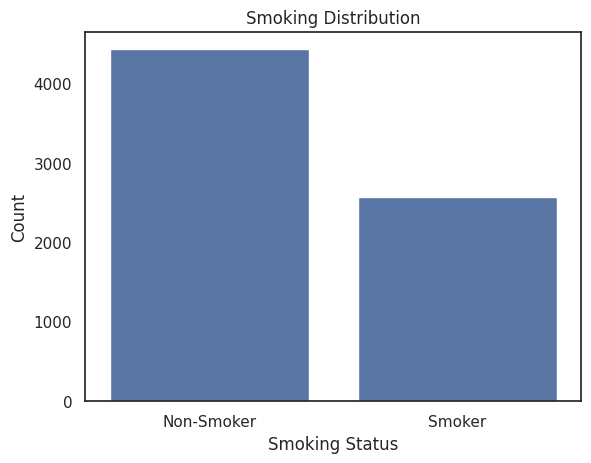

In [ ]:
except_target = train.drop('smoking_label', axis=1)
except_target.hist(figsize=(12, 12))
plt.show()

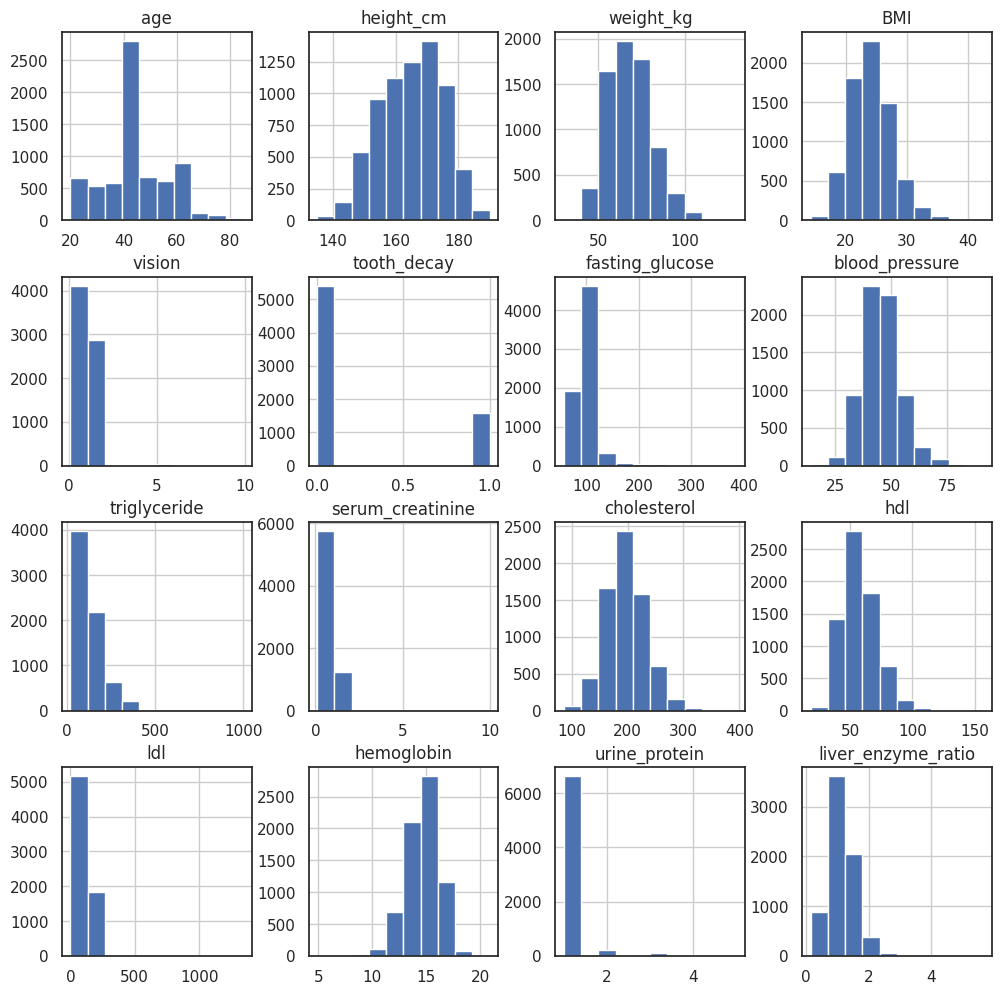

In [ ]:
cat_cols = ['tooth_decay', 'urine_protein']

con_cols = ['age', 'height_cm', 'weight_kg', 'BMI', 'vision', 'fasting_glucose',
            'blood_pressure', 'triglyceride', 'serum_creatinine', 'cholesterol',
            'hdl', 'ldl', 'hemoglobin', 'liver_enzyme_ratio']

In [ ]:
for col in cat_cols:
    ct = pd.crosstab(train[col], train['smoking_label'], normalize='index')
    ct.plot(kind='bar', stacked=True, figsize=(5, 4), colormap='coolwarm')
    plt.title(f'{col} vs Smoking Label')
    plt.ylabel('Proportion')
    plt.show()

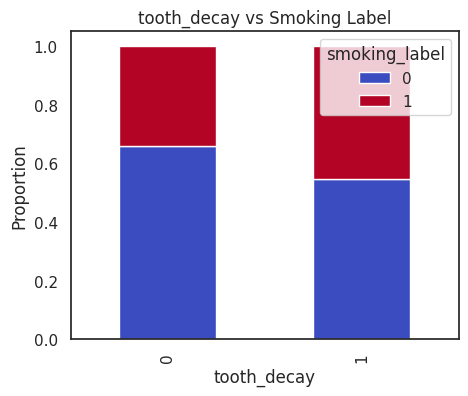

## 5.1. 이상치 처리

In [ ]:
# boxplot으로 이상치 확인해보기
plt.figure(figsize=(14, 8))
sns.boxplot(data=train[con_cols])
plt.xticks(rotation=45)
plt.title("Boxplot of Continuous Features")
plt.show()

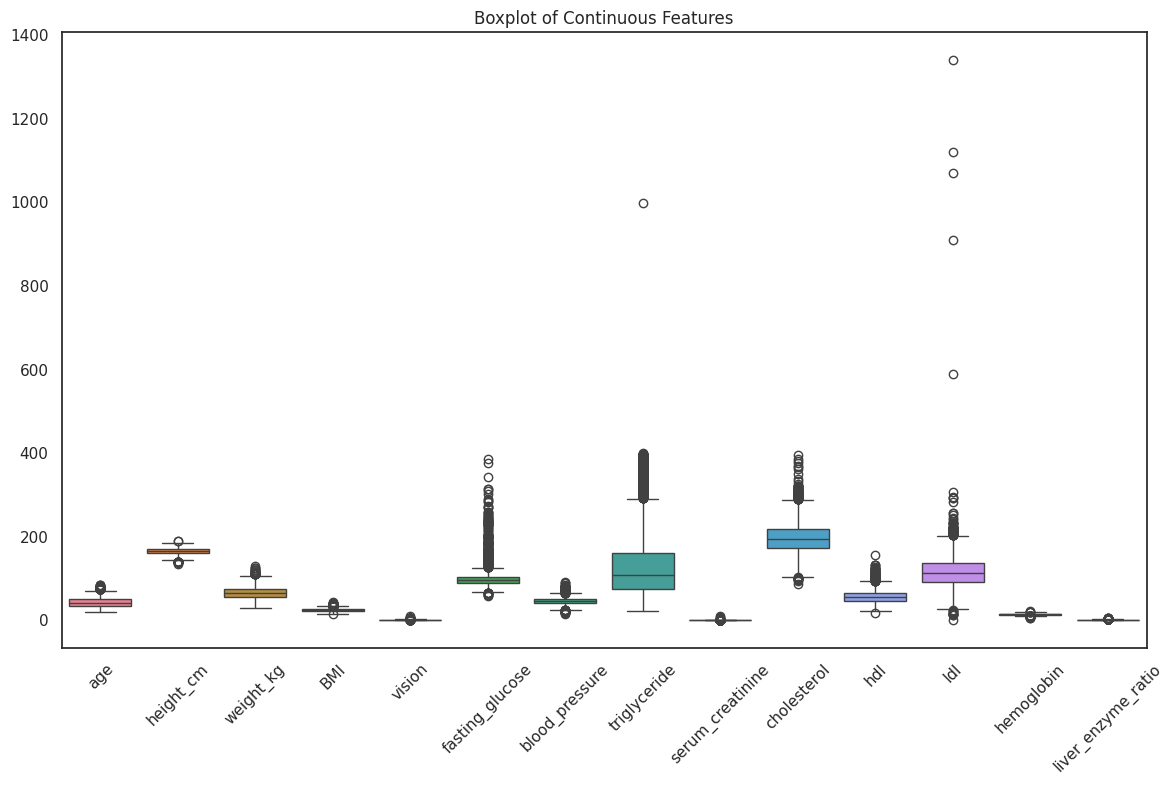

In [ ]:
# IQR 기준 이상치 비율 계산
Q1 = train[con_cols].quantile(0.25)
Q3 = train[con_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_ratio = ((train[con_cols] < (Q1 - 1.5 * IQR)) | (train[con_cols] > (Q3 + 1.5 * IQR))).mean().sort_values(ascending=False)
outlier_ratio

In [ ]:
train[train['vision'] > 3.0]

    시력이 5.0이 넘어가는 친구들을 어떻게 대체할 수 있을까...
    나이대별로 시력이 대충 정해져있으니 (물론 아닌 경우도 존재하겠지만)
    나이대별 중앙값으로 대체해보자.

In [ ]:
# 시력 이상값을 결측으로 표시
train.loc[train['vision'] > 2.5, 'vision'] = np.nan
test.loc[test['vision'] > 2.5, 'vision'] = np.nan

# 나이대 구간화
bins = [0, 29, 39, 49, 59, 69, 79, 100]
labels = ['20s','30s','40s','50s','60s','70s','80+']
train['age_group'] = pd.cut(train['age'], bins=bins, labels=labels)
test['age_group'] = pd.cut(test['age'], bins=bins, labels=labels)

# 나이대별 중앙값으로 대체
train['vision'] = train.groupby('age_group')['vision'].transform(lambda x: x.fillna(x.median()))
test['vision'] = test.groupby('age_group')['vision'].transform(lambda x: x.fillna(x.median()))

train = train.drop(columns=['age_group'])
test = test.drop(columns=['age_group'])

In [ ]:
len(train[train['vision'] > 3.0])



```
0
```



In [ ]:
# 테스트 데이터에는 다행히 없네...
len(test[test['vision'] > 3.0])

In [ ]:
# 충치 여부만 0/1로 이진 변수이기에 category 타입으로 변경해주기
for df in [train, test]:
    df.drop(columns=['ID'], inplace=True)
    df['tooth_decay'] = df['tooth_decay'].astype('category')

# 6. 데이터 분리 및 스케일링

In [ ]:
X_train = train.drop(columns=['smoking_label'])
y_train = train['smoking_label']
X_test = test.copy()

In [ ]:
# 이상치 날리기에도 애매한 그 때에는 RobustScaler로 !
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

# fit은 train에서만 !
scaler.fit(X_train[con_cols])

# transform은 train/test 둘 다 동일하게
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[con_cols] = scaler.transform(X_train[con_cols])
X_test_scaled[con_cols] = scaler.transform(X_test[con_cols])

In [ ]:
X_test_scaled.describe().T.round(2)

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=X_train_scaled[con_cols])
plt.xticks(rotation=45)
plt.title("After Robust Scaling")
plt.show()

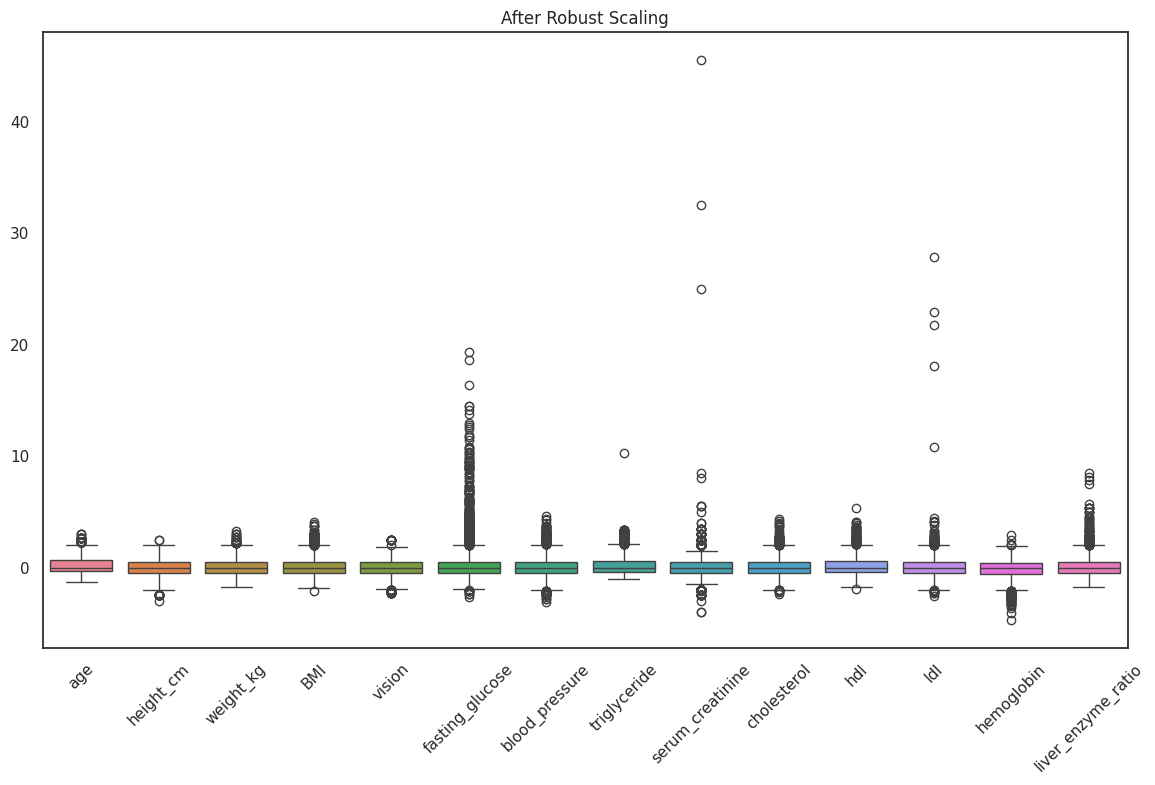

# 7. 모델링

## 7.1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

lr_clf = LogisticRegressionCV(cv=5, penalty='elasticnet', solver='saga',
                              Cs=np.power(10, np.arange(-3, 1, dtype=float)),
                              l1_ratios=np.linspace(0, 1, num=6, dtype=float),
                              max_iter=100, class_weight='balanced', random_state=0)

start = time()
lr_clf.fit(X_train_scaled, y_train)
lr_duration = time() - start

print(f'Logistic Regression CV took {lr_duration:.2f} seconds for {lr_clf.n_iter_.shape[1]} cv iterations with {lr_clf.n_iter_.shape[2] * lr_clf.n_iter_.shape[3]} parameter settings.')

print(f'Optimal regularization strength: {lr_clf.C_[0]} Optimal L1 Ratio: {lr_clf.l1_ratio_[0]}')
print(f'Accuracy: {lr_clf.score(X_train_scaled, y_train):.2f}')



```
Logistic Regression CV took 21.73 seconds for 5 cv iterations with 24 parameter settings.
Optimal regularization strength: 1.0 Optimal L1 Ratio: 0.4
Accuracy: 0.71
```



In [ ]:
lr_params = dict(zip(list(df.iloc[:, 2:].columns), list(lr_clf.coef_[0])),
                 intercept=lr_clf.intercept_[0])

{param: float(value.round(2)) for (param, value) in sorted(lr_params.items(), key=lambda item: item[1], reverse=True)}



```
{'BMI': 1.06, 'liver_enzyme_ratio': 0.98, 'cholesterol': 0.43,
 'blood_pressure': 0.38, 'tooth_decay': 0.37, 'triglyceride': 0.12,
 'hdl': 0.06, 'weight_kg': 0.04, 'fasting_glucose': 0.04,
 'serum_creatinine': -0.02, 'hemoglobin': -0.03, 'urine_protein': -0.06,
 'ldl': -0.11, 'intercept': -0.17, 'vision': -0.79}
```



    대부분 0 근처에 몰려 있다면, 규제가 잘 작동한 것으로 판단할 수 있다.
    일부 큰 계수가 있다면, 해당 변수들이 강하게 작용한 것으로 볼 수 있다.
    부호가 일관되고 생리적으로 타당하다면, 의미 있는 학습으로 볼 수 있다.

In [ ]:
coefs = pd.Series(lr_clf.coef_[0], index=X_train_scaled.columns)

plt.figure(figsize=(10, 5))
sns.histplot(coefs, bins=20, kde=True)
plt.title("Distribution of Logistic Regression Coefficients")
plt.xlabel("Coefficient value")
plt.ylabel("Frequency")
plt.show()

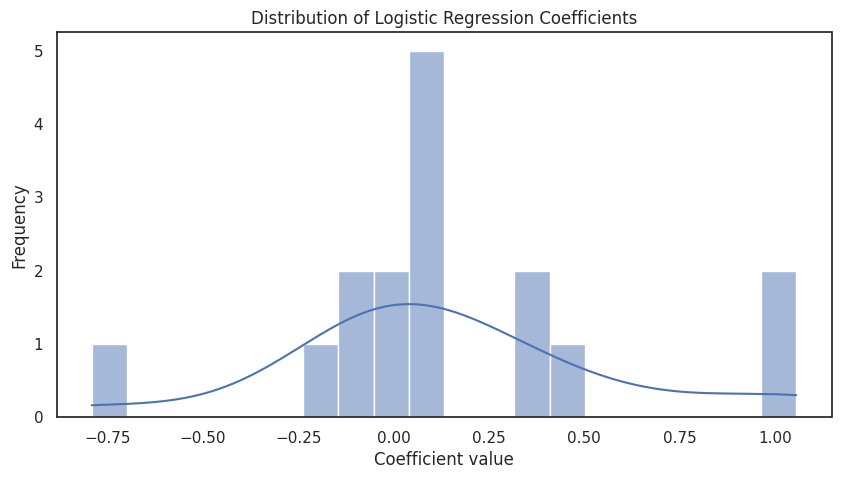

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

y_prob = lr_clf.predict_proba(X_train_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_train, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve")
plt.show()

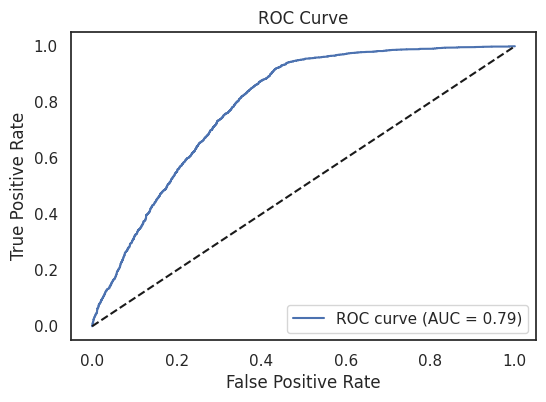

## 7.2. KNN

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for k in [3, 5, 7, 9, 11]:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=cv, scoring='roc_auc')
    print(f"k={k:2d} | ROC-AUC: {scores.mean():.3f} ± {scores.std():.3f}")



```
k= 3 | ROC-AUC: 0.737 ± 0.012
k= 5 | ROC-AUC: 0.764 ± 0.011
k= 7 | ROC-AUC: 0.779 ± 0.012
k= 9 | ROC-AUC: 0.785 ± 0.011
k=11 | ROC-AUC: 0.789 ± 0.011
```



In [ ]:
k_range = range(1, 21)
roc_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=cv, scoring='roc_auc')
    roc_scores.append(scores.mean())

plt.figure(figsize=(7, 4))
plt.plot(k_range, roc_scores, marker='o')
plt.title('KNN ROC-AUC by Number of Neighbors (k)')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Mean ROC-AUC')
plt.grid(True)
plt.show()

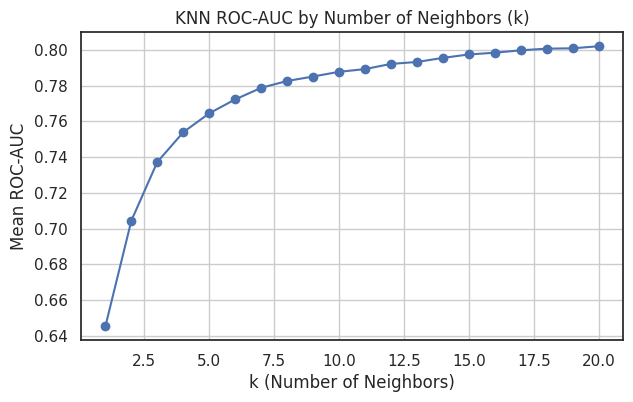

## 7.3. LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
scores_lda = cross_val_score(lda, X_train_scaled, y_train, cv=cv, scoring='roc_auc')

print(f"LDA ROC-AUC: {scores_lda.mean():.3f} ± {scores_lda.std():.3f}")



```
LDA ROC-AUC: 0.790 ± 0.008
```



In [ ]:
lda.fit(X_train_scaled, y_train)
X_lda = lda.transform(X_train_scaled)

plt.figure(figsize=(7, 4))
sns.histplot(X_lda[y_train == 0], color='skyblue', label='Non-Smoker', kde=True, stat='density')
sns.histplot(X_lda[y_train == 1], color='salmon', label='Smoker', kde=True, stat='density')
plt.title("LDA Projected Distribution (Train)")
plt.xlabel("LDA Projection (LD1)")
plt.legend()
plt.show()

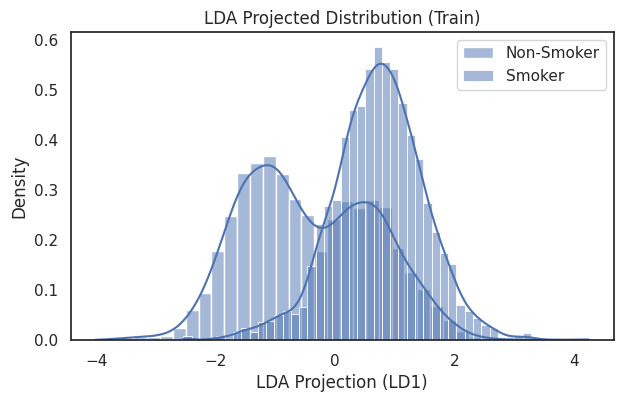

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_lda = lda.predict(X_train_scaled)

cm = confusion_matrix(y_train, y_pred_lda)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Smoker', 'Smoker'])
disp.plot(cmap='Blues')
plt.title("LDA Confusion Matrix (Train)")
plt.show()

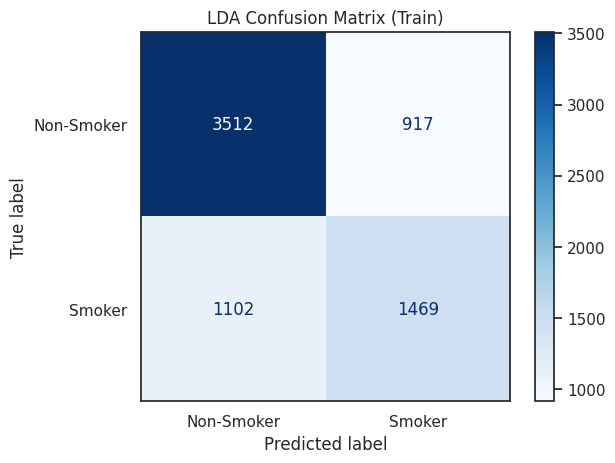

In [ ]:
coef_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'LDA_Coefficient': lda.coef_[0]
}).sort_values('LDA_Coefficient', ascending=False)

coef_df.head()



```
LDA 결과, height_cm이 가장 큰 양의 계수를 보여 클래스 간 분리축 형성에 가장 큰 기여를 하였다.
이는 키가 다른 생리 지표(BMI, hemoglobin, triglyceride)와 함께 흡연자 집단을 구분하는 방향으로 작용했음을 의미한다.
다만 이는 통계적 분류상의 중요도를 의미하며, 인과적으로 “키가 클수록 흡연 가능성이 높다”로 해석할 수는 없다.
```



## 7.4. SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(probability=True, class_weight='balanced', random_state=42),
                    param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

print("Best params:", grid.best_params_)
print("Best CV ROC-AUC:", grid.best_score_)



```
Best params: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best CV ROC-AUC: 0.7959589914419789
```



In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

svc_best = SVC(kernel='rbf', C=grid.best_params_['C'], gamma=grid.best_params_['gamma'], probability=True)
svc_best.fit(X_pca, y_train)

xx, yy = np.meshgrid(
    np.linspace(X_pca[:, 0].min()-1, X_pca[:, 0].max()+1, 200),
    np.linspace(X_pca[:, 1].min()-1, X_pca[:, 1].max()+1, 200)
)
Z = svc_best.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(6, 5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='coolwarm', s=20, edgecolor='k')
plt.title("SVC Decision Boundary (PCA 2D Projection)")
plt.show()

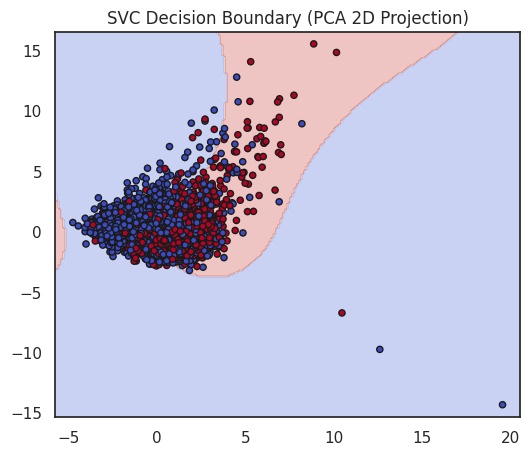

In [ ]:
y_pred_svc = grid.best_estimator_.predict(X_train_scaled)
y_prob_svc = grid.best_estimator_.predict_proba(X_train_scaled)[:, 1]

cm = confusion_matrix(y_train, y_pred_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Smoker', 'Smoker'])
disp.plot(cmap='Blues')
plt.title("SVC Confusion Matrix (Train)")
plt.show()

print(classification_report(y_train, y_pred_svc))
print("ROC-AUC:", roc_auc_score(y_train, y_prob_svc))

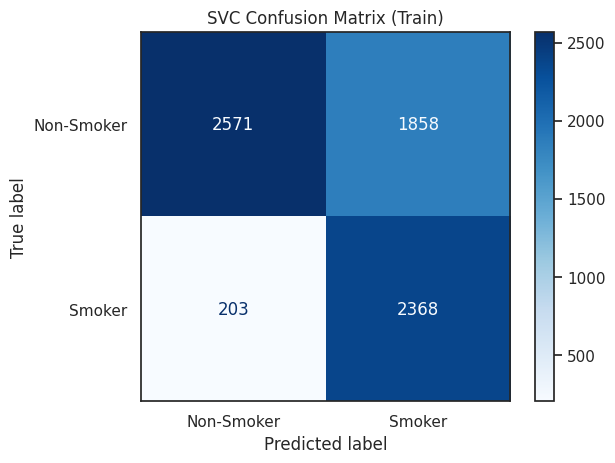



```
              precision    recall  f1-score   support

           0       0.93      0.58      0.71      4429
           1       0.56      0.92      0.70      2571

    accuracy                           0.71      7000
   macro avg       0.74      0.75      0.71      7000
weighted avg       0.79      0.71      0.71      7000

ROC-AUC: 0.8132942254380648
```



In [ ]:
support_count = grid.best_estimator_.n_support_
print(f"Support vectors per class: {support_count}")



```
Support vectors per class: [2558 1543]
```



# 8. 결론

---

    도메인 불가능값은 대체하기
    예를 들어 시력이 10.0?이면, 전처리로 연령대 그룹의 중앙값으로 대체하기

    실존하는 극단값은 보존 + 완화해주기
    triglyceride, liver_enzyme_ratio 등은 RobustScaler + 필요 시 winsorization/log 변환

    극단값 많은 의료 수치 등은 RobustScaler 우선, 트리 모델은 스케일 안 해도 상관없다.